In [41]:
import numpy
import pandas
import matplotlib.pylab as plt
%matplotlib inline
import seaborn
import requests
import time

In [42]:
plt.rcParams['figure.figsize'] = 16, 9

In [43]:
df = pandas.read_csv('gp.csv', header=0)

In [44]:
df['h']  = pandas.to_timedelta(df['Zeit']) / numpy.timedelta64(1, 'h')

In [45]:
df['Jahr'] = [int(date.split('-')[0]) for date in df['Datum']]

In [46]:
# Read the API key from disk
# Get your own at https://darksky.net/dev/, the first 1000 forecasts per day are free.
api_key=numpy.loadtxt('api.key', dtype='str')

In [47]:
# Where is Bern
lat_bern = "46.96334"
lon_bern = "7.43911"

In [52]:
temp_dict_min = dict()
temp_dict_max = dict()
temp_dict_all = dict()

In [55]:
# Grab the temperature according to https://github.com/thisss/eisheilige/blob/master/eisheilige.ipynb
for jahr in range(2000,2017):
    temp_minimum = dict()
    temp_maximum = dict()
    temp_all = dict()
    temp_abfragestring = str(jahr) + '-05-14T16:45:00' + '?lang=de' + '&units=auto'
    response = requests.get('https://api.darksky.net/forecast/9ca98118d90446e9dbc49b25b7a66c4a/46.96334,7.43911,2016-05-14T16:45:00?lang=de&units=auto')
    #response = requests.get('https://api.darksky.net/forecast/' + api_key + '/' + lat_bern + ',' + lon_bern + ',' +  temp_abfragestring)
    data_bern = response.json()
    temp_minimum[jahr] = pandas.DataFrame(data_bern['hourly']['data'])['temperature'].min()
    temp_maximum[jahr] = pandas.DataFrame(data_bern['hourly']['data'])['temperature'].max()
    temp_all[jahr] = pandas.DataFrame(data_bern['hourly']['data'])['temperature']
    time.sleep(2)
    print(temp_minimum)

{2000: 8.2400000000000002}
{2001: 8.2400000000000002}
{2002: 8.2400000000000002}
{2003: 8.2400000000000002}
{2004: 8.2400000000000002}
{2005: 8.2400000000000002}
{2006: 8.2400000000000002}
{2007: 8.2400000000000002}
{2008: 8.2400000000000002}
{2009: 8.2400000000000002}
{2010: 8.2400000000000002}
{2011: 8.2400000000000002}
{2012: 8.2400000000000002}
{2013: 8.2400000000000002}
{2014: 8.2400000000000002}
{2015: 8.2400000000000002}
{2016: 8.2400000000000002}


In [28]:
df.to_dense()

,Datum,Zeit,Link,h,Jahr
0,2017-05-13,1:14:14,http://bern.mikatiming.de/2017/?content=detail...,1.237222,2017
1,2016-05-14,1:13:35,http://bern.mikatiming.de/2016/?content=detail...,1.226389,2016
2,2015-05-09,1:13:57,http://bern.mikatiming.de/2015/?content=detail...,1.232500,2015
3,2014-05-10,1:14:55,http://bern.mikatiming.de/2014/?content=detail...,1.248611,2014
4,2013-05-18,1:15:59,http://bern.mikatiming.de/2013/?content=detail...,1.266389,2013
5,2012-05-12,1:11:42,http://bern.mikatiming.de/2012/?content=detail...,1.195000,2012
6,2011-05-14,NaN,http://bern.mikatiming.de/2011/?content=detail...,NaN,2011
7,2010-05-22,NaN,NaN,NaN,2010
8,2009-04-18,1:12:39,http://bern.mikatiming.de/2009/?content=detail...,1.210833,2009
9,2008-05-10,NaN,NaN,NaN,2008


In [29]:
difference = numpy.max(df['h']) - numpy.min(df['h'])
print('Times vary by %s minutes and %s seconds' % (int(60 * difference),
                                                   int(60 * (60 * difference % int(60 * difference)))))

Times vary by 23 minutes and 34 seconds


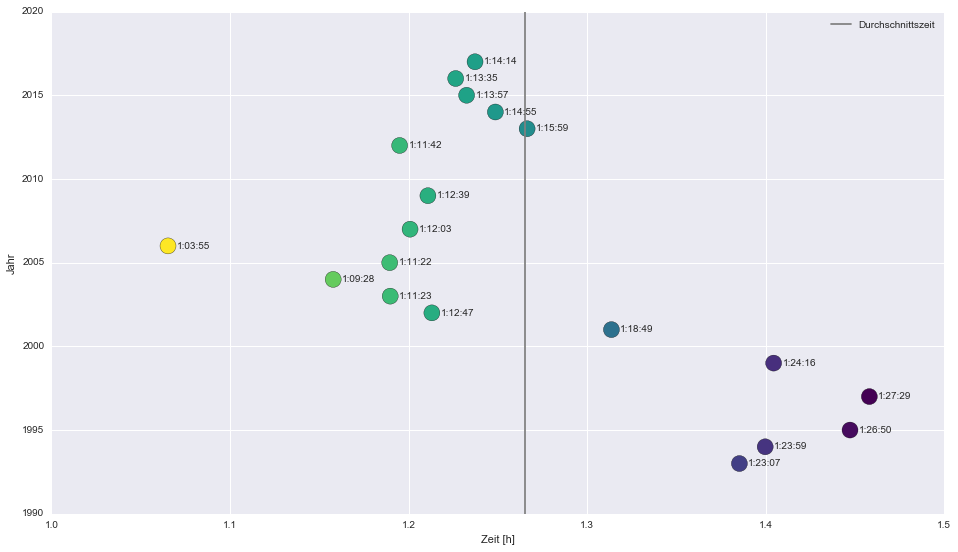

In [30]:
plt.scatter(df['h'], df['Jahr'], cmap='viridis', c=1-df['h'], s=256, label='')
plt.axvline(numpy.nanmean(df['h']), label='Durchschnittszeit', color='gray')
for i, txt in enumerate(df['Zeit']):
    # http://stackoverflow.com/a/37242674/323100
    plt.gca().annotate(txt, (df['h'][i]+0.005, df['Jahr'][i]),
                       horizontalalignment='left',
                       verticalalignment='center')
plt.ylabel('Jahr')
plt.xlabel('Zeit [h]')
plt.legend(loc='best')
plt.show()

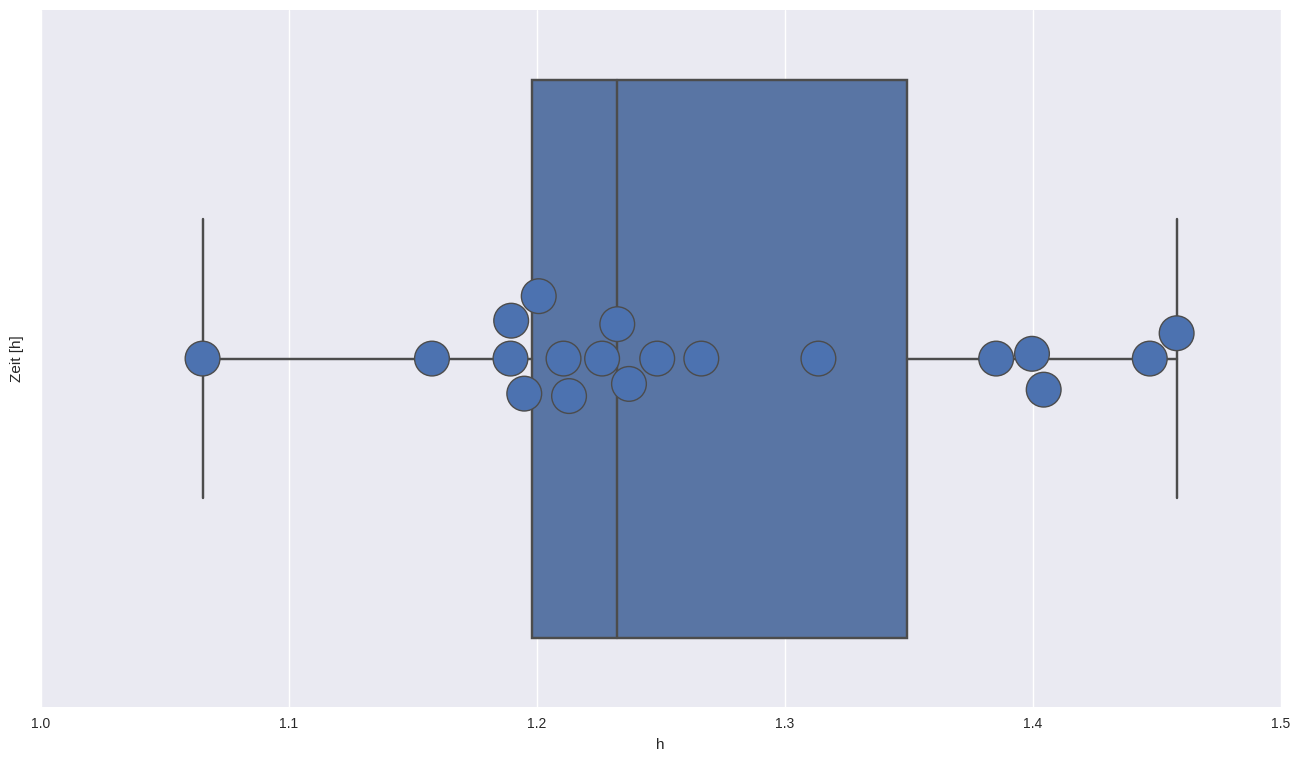

In [8]:
seaborn.boxplot(df['h'])
seaborn.swarmplot(df['h'], size=25, edgecolor='gray', linewidth=1)
plt.ylabel('Zeit [h]')
plt.show()